<a href="https://colab.research.google.com/github/su92-msaiw-f25-006-boop/lessons-learned/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression Model**

**Import libraries**

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt



1.   Data Collection






In [3]:
x_train = [
    2, 3, 5, 7, 8, 10,
    11, 12, 13, 14, 15,
    16, 17, 18, 19, 20,
    21, 22, 23, 24, 25,
    26, 27, 28, 30
]
y_train = [
    2.5, 2.8, 3.2, 3.6, 3.8, 4.0,
    4.1, 4.2, 4.3, 4.4, 4.5,
    4.6, 4.7, 4.8, 4.9, 5.0,
    5.1, 5.2, 5.3, 5.4, 5.5,
    5.6, 5.7, 5.8, 6.0
]

**Convert to numpy arrays**

In [5]:
x_train = np.array(x_train, dtype=np.float32).reshape(-1, 1)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)

In [6]:
x_train,y_train

(array([[ 2.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 8.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [30.]], dtype=float32),
 array([[2.5],
        [2.8],
        [3.2],
        [3.6],
        [3.8],
        [4. ],
        [4.1],
        [4.2],
        [4.3],
        [4.4],
        [4.5],
        [4.6],
        [4.7],
        [4.8],
        [4.9],
        [5. ],
        [5.1],
        [5.2],
        [5.3],
        [5.4],
        [5.5],
        [5.6],
        [5.7],
        [5.8],
        [6. ]], dtype=float32))

**Visulized data in graphs**

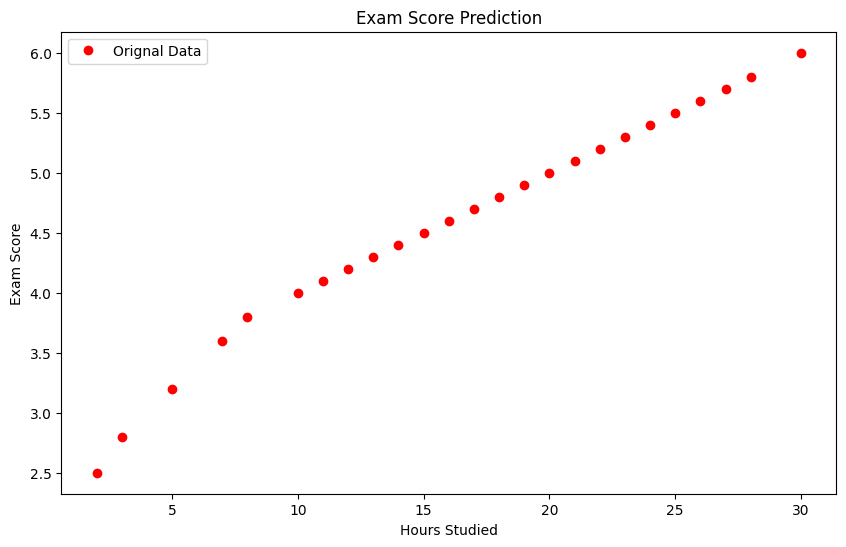

In [9]:
fig=plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, 'ro', label = 'Orignal Data')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

**convert into numpy to tensor**

In [10]:
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
x_train,y_train

(tensor([[ 2.],
         [ 3.],
         [ 5.],
         [ 7.],
         [ 8.],
         [10.],
         [11.],
         [12.],
         [13.],
         [14.],
         [15.],
         [16.],
         [17.],
         [18.],
         [19.],
         [20.],
         [21.],
         [22.],
         [23.],
         [24.],
         [25.],
         [26.],
         [27.],
         [28.],
         [30.]]),
 tensor([[2.5000],
         [2.8000],
         [3.2000],
         [3.6000],
         [3.8000],
         [4.0000],
         [4.1000],
         [4.2000],
         [4.3000],
         [4.4000],
         [4.5000],
         [4.6000],
         [4.7000],
         [4.8000],
         [4.9000],
         [5.0000],
         [5.1000],
         [5.2000],
         [5.3000],
         [5.4000],
         [5.5000],
         [5.6000],
         [5.7000],
         [5.8000],
         [6.0000]]))

**Build a Linear Regression model**

In [11]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)
  def forward(self, x):
     out=self.linear(x)
     return out

**object creation**

In [12]:
models = LinearRegression()

In [13]:
models

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

**Check model state**

In [14]:
models.state_dict()

OrderedDict([('linear.weight', tensor([[0.1553]])),
             ('linear.bias', tensor([0.7415]))])

**add loss function**



In [15]:
criterion = nn.MSELoss()

**Define Optimizer**

In [17]:
optimizer = torch.optim.SGD(models.parameters(), lr=0.01)

**Training Loop**

In [20]:
num_epochs = 500
losses = []

In [21]:
for epoch in range(num_epochs):

    y_pred = models(x_train)


    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/500], Loss: nan
Epoch [200/500], Loss: nan
Epoch [300/500], Loss: nan
Epoch [400/500], Loss: nan
Epoch [500/500], Loss: nan


**Training Loss**

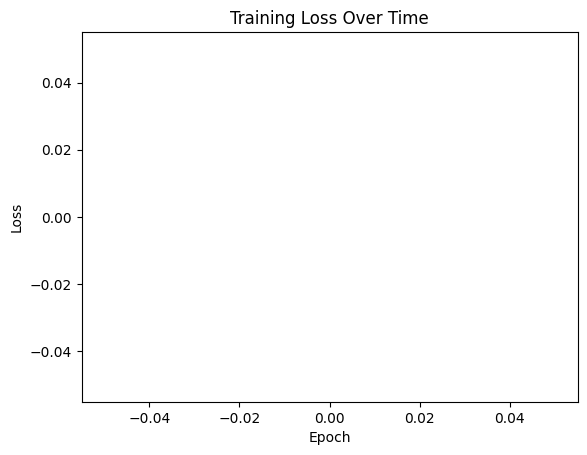

In [22]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()